In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt


wordlist = pd.read_excel('Word List.xlsx')
Tokenrip = pd.read_excel('Individual_tokens.xlsx')
Schoolref = pd.read_excel('Brochure_School_reference.xlsx')


#wordlist.head()
#Tokenrip.head()
#Schoolref.head()


In [2]:
##Merge Dataframes

merge1 = pd.merge(Tokenrip, wordlist, how='left', left_on='Token_ripped', right_on='Token')
merge1 = merge1.drop(columns='Token')

completedf = pd.merge(merge1, Schoolref, how='left', left_on='Source_brochure', right_on='Brochure_source')
completedf = completedf.drop(columns=['Brochure_source','Source_brochure'])
completedf = completedf[['School_name','School_region','School_group','Token_ripped','specific_semantics','Broad_semantics','Occurrences']]

completedf.head()
#completedf.to_excel('CompleteDataFrame.xlsx',index=False)

##filtering comparable schools (School_group == A)

comparableschools = completedf.loc[(completedf['School_group'] == 'A')&(completedf['School_region'] == 'EU')]


In [3]:
##Creating Broad and Specific semantic dataframes

BroadSemantics = comparableschools.groupby(['School_name','Broad_semantics']).sum()
SpecificSemantics = comparableschools.groupby(['School_name','specific_semantics']).sum()


BroadSemantics.head(35)



Occurrences
School_name Broad_semantics                  
Bocconi     ACAD-PERSONALIZATION           43
            ACAD-PRACTICAL                 87
            ANALYTICAL                     13
            BEHAV-SKILLS                   19
            DIVERSITY                       4
            EMPLOYMENT                     88
            ENTREPRENEURSHIP               35
            FUNCTIONS                      30
            GLOBAL                         83
            GLOBAL-SPECIFIC                15
            IMPACT                         18
            INNOVATION                     18
            LEADERSHIP & MGMT             111
            NETWORKING                     19
            PRESTIGE                        5
            RANKING & ACCRED                4
            SECTORS                       134
            SUCCESS                         5
            SUSTAINABILITY                  6
            TECH-DIGITAL                   13
            zMISC                          39
            zMISC-DESCRIPTIVE               7
Durham      ACAD-PERSONALIZATION           13
            ACAD-PRACTICAL                 59
            ACAD-THEORY                     5
            ANALYTICAL                     10
            BEHAV-SKILLS                    9
            DIVERSITY                       5
            EMPLOYMENT                     31
            ENTREPRENEURSHIP               12
            FUNCTIONS                      18
            GLOBAL                         46
            GLOBAL-SPECIFIC                 7
            IMPACT                          6
            INNOVATION                      8

In [4]:
##Calculating ZScore within and across brochures

BroadSemantics["Zscorewithin"] = BroadSemantics.groupby(['School_name']).Occurrences.transform(lambda x : zscore(x,ddof=0))
BroadSemantics["Zscoreacross"] = BroadSemantics.groupby(['Broad_semantics']).Zscorewithin.transform(lambda x : zscore(x,ddof=0))


##Calculating Average Freq of categories and stdev

BroadSemantics["Freq"] = (BroadSemantics['Occurrences']) / (BroadSemantics.groupby('School_name')['Occurrences'].sum())
#BroadSemantics["Freqstdev"] = BroadSemantics.groupby(['Broad_semantics']).Freq.transform(lambda x : zscore(x,ddof=0))
BroadSemantics.head(35)


#provided Runtime warning (divide by 0?) For awareness as specific semantics are not yet used
#SpecificSemantics["Zscorewithin"] = SpecificSemantics.groupby(['School_name']).Occurrences.transform(lambda x : zscore(x,ddof=0))
#SpecificSemantics["Zscoreacross"] = SpecificSemantics.groupby(['specific_semantics']).Zscorewithin.transform(lambda x : zscore(x,ddof=0))
#SpecificSemantics.head(35)



Occurrences  Zscorewithin  Zscoreacross  \
School_name Broad_semantics                                                 
Bocconi     ACAD-PERSONALIZATION           43      0.180839      0.246531   
            ACAD-PRACTICAL                 87      1.347857     -0.394259   
            ANALYTICAL                     13     -0.614854      0.346860   
            BEHAV-SKILLS                   19     -0.455715     -0.733437   
            DIVERSITY                       4     -0.853562     -0.463709   
            EMPLOYMENT                     88      1.374380      0.699091   
            ENTREPRENEURSHIP               35     -0.031346      1.021066   
            FUNCTIONS                      30     -0.163961      0.157248   
            GLOBAL                         83      1.241764     -0.253790   
            GLOBAL-SPECIFIC                15     -0.561808     -0.533211   
            IMPACT                         18     -0.482239     -0.266555   
            INNOVATION                     18     -0.482239     -0.349907   
            LEADERSHIP & MGMT             111      1.984412      0.384277   
            NETWORKING                     19     -0.455715      0.562334   
            PRESTIGE                        5     -0.827039     -0.512768   
            RANKING & ACCRED                4     -0.853562      0.124468   
            SECTORS                       134      2.594444      0.935966   
            SUCCESS                         5     -0.827039     -0.177930   
            SUSTAINABILITY                  6     -0.800516      0.117097   
            TECH-DIGITAL                   13     -0.614854     -0.439589   
            zMISC                          39      0.074747     -1.187437   
            zMISC-DESCRIPTIVE               7     -0.773993     -0.530866   
Durham      ACAD-PERSONALIZATION           13     -0.275463     -0.587865   
            ACAD-PRACTICAL                 59      2.593512      1.556813   
            ACAD-THEORY                     5     -0.774415      0.488425   
            ANALYTICAL                     10     -0.462570      1.134713   
            BEHAV-SKILLS                    9     -0.524939     -0.823369   
            DIVERSITY                       5     -0.774415     -0.214120   
            EMPLOYMENT                     31      0.847179     -0.034430   
            ENTREPRENEURSHIP               12     -0.337832      0.058385   
            FUNCTIONS                      18      0.036382      0.910346   
            GLOBAL                         46      1.782714      0.574149   
            GLOBAL-SPECIFIC                 7     -0.649677     -0.724181   
            IMPACT                          6     -0.712046     -1.019600   
            INNOVATION                      8     -0.587308     -0.560820   

                                      Freq  
School_name Broad_semantics                 
Bocconi     ACAD-PERSONALIZATION  0.054020  
            ACAD-PRACTICAL        0.109296  
            ANALYTICAL            0.016332  
            BEHAV-SKILLS          0.023869  
            DIVERSITY             0.005025  
            EMPLOYMENT            0.110553  
            ENTREPRENEURSHIP      0.043970  
            FUNCTIONS             0.037688  
            GLOBAL                0.104271  
            GLOBAL-SPECIFIC       0.018844  
            IMPACT                0.022613  
            INNOVATION            0.022613  
            LEADERSHIP & MGMT     0.139447  
            NETWORKING            0.023869  
            PRESTIGE              0.006281  
            RANKING & ACCRED      0.005025  
            SECTORS               0.168342  
            SUCCESS               0.006281  
            SUSTAINABILITY        0.007538  
            TECH-DIGITAL          0.016332  
            zMISC                 0.048995  
            zMISC-DESCRIPTIVE     0.008794  
Durham      ACAD-PERSONALIZATION  0.031100  
            ACAD-PRACTICAL        0.141148  
            AC

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


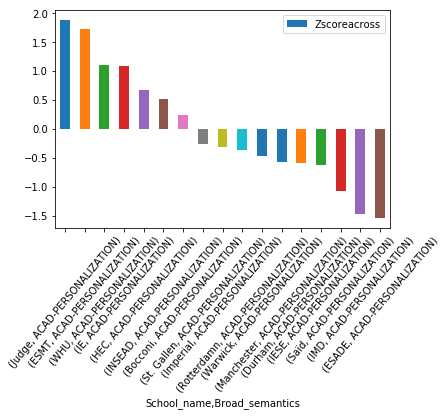

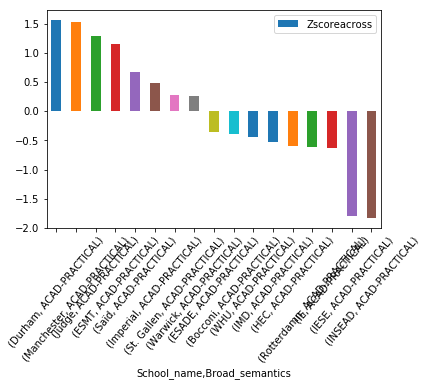

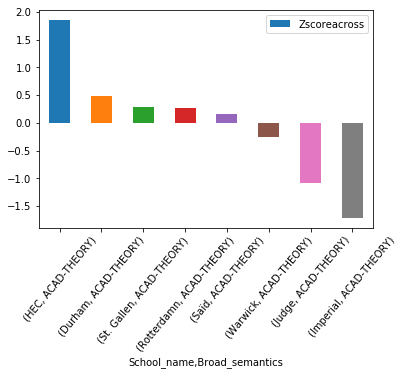

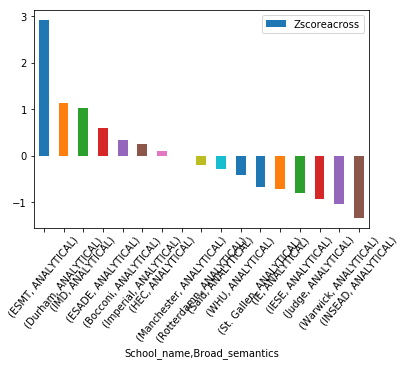

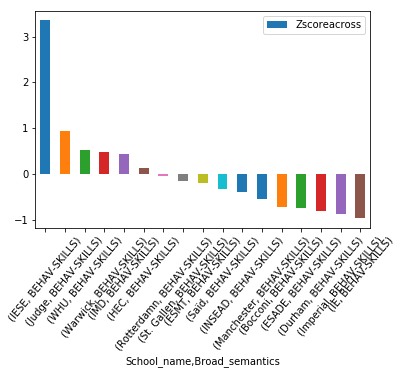

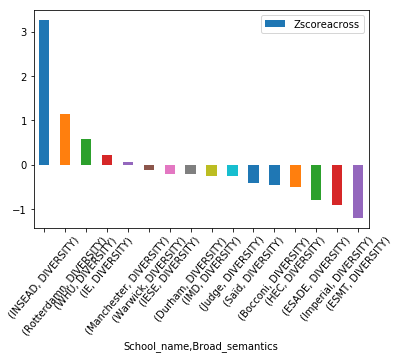

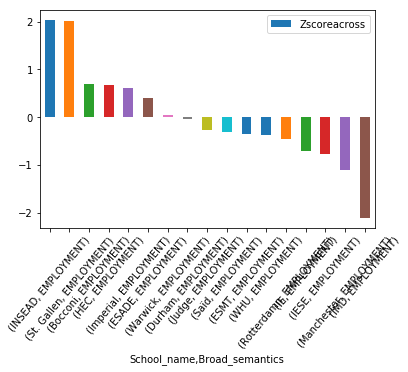

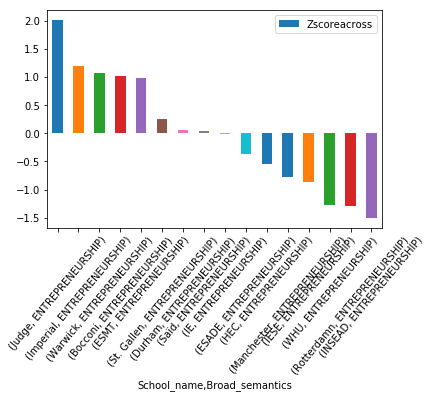

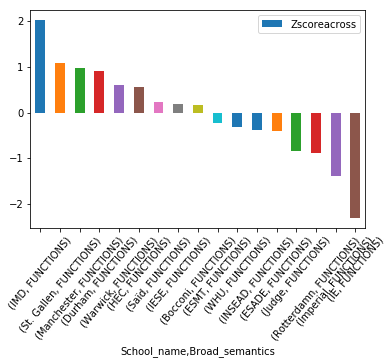

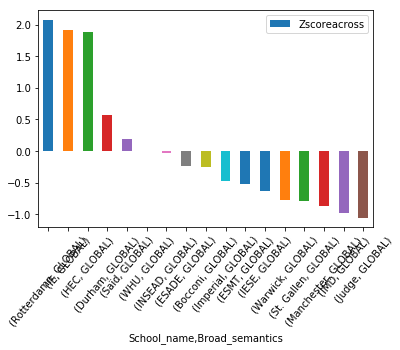

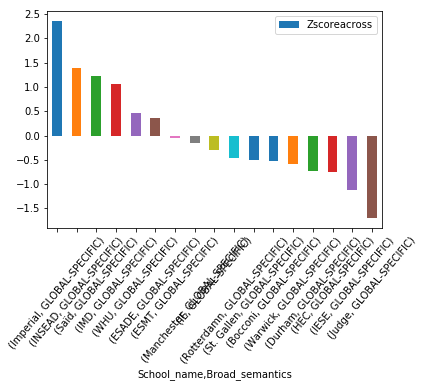

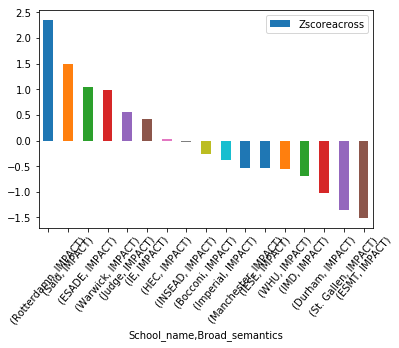

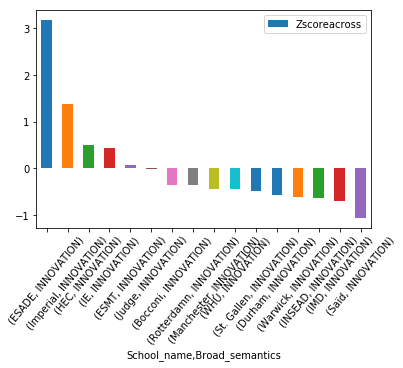

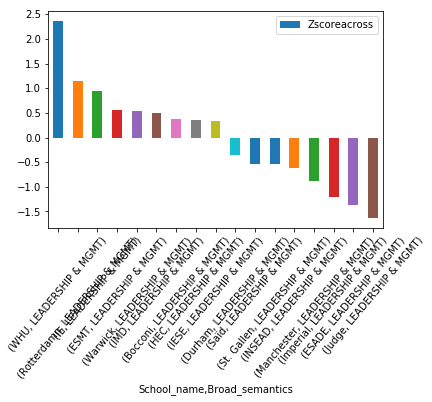

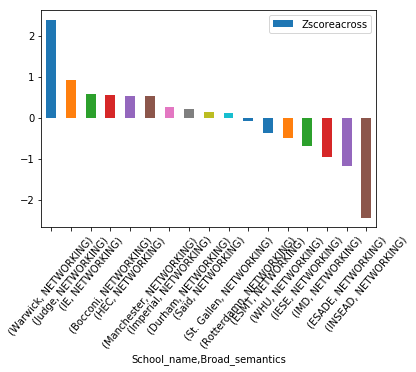

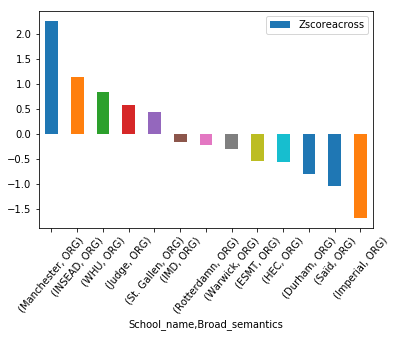

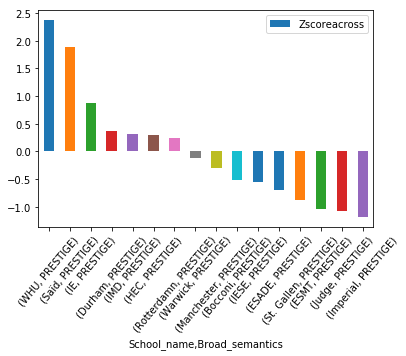

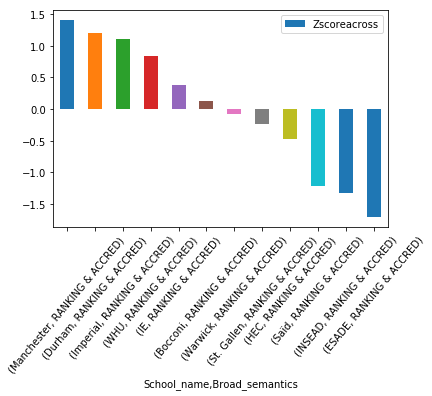

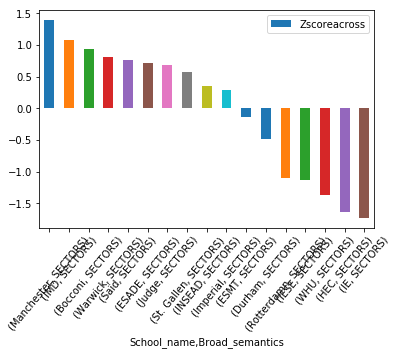

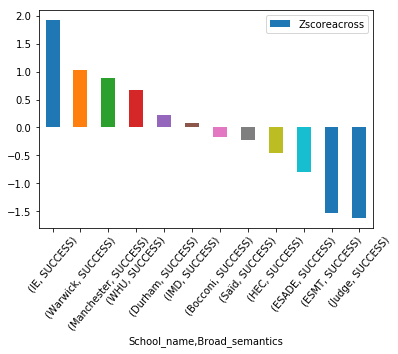

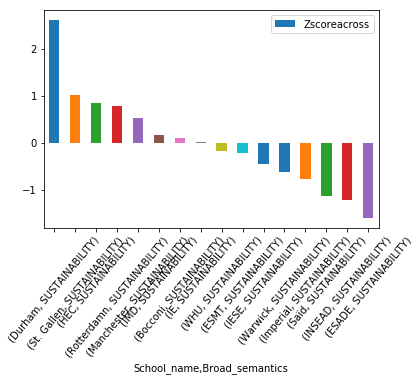

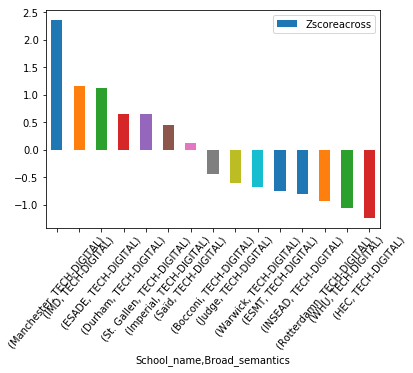

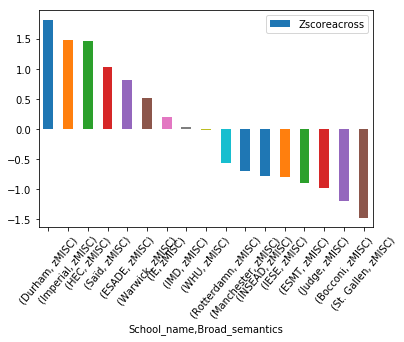

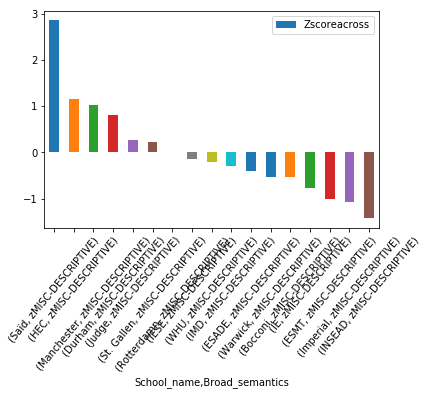

In [5]:
broadsemplotcategories = BroadSemantics.sort_values(by='Zscoreacross',ascending=False).groupby(['Broad_semantics']).plot.bar(y='Zscoreacross', rot=50, align='center')


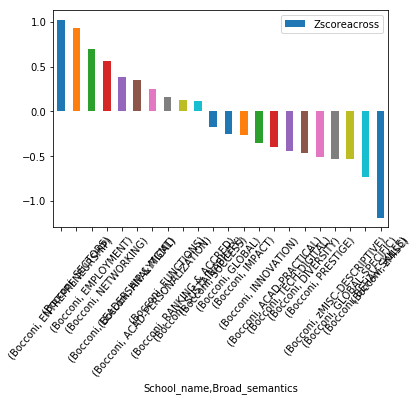

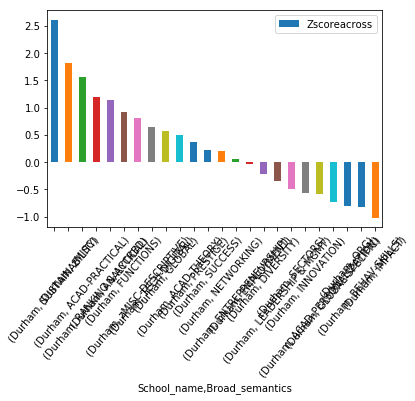

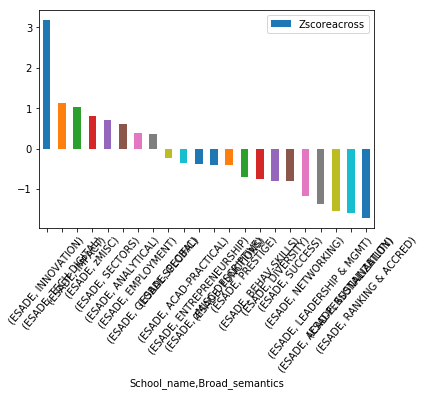

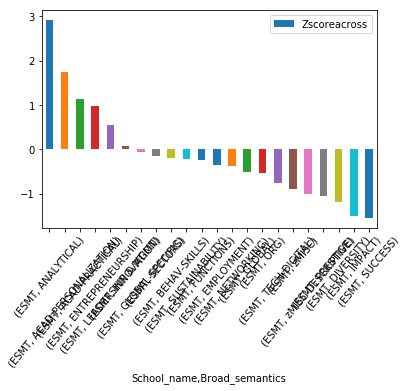

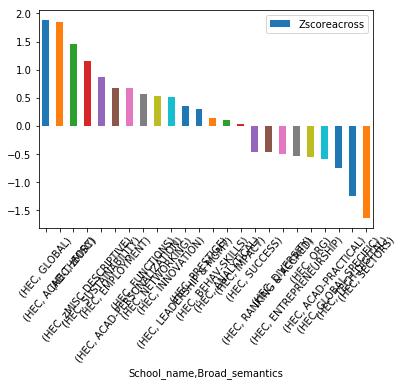

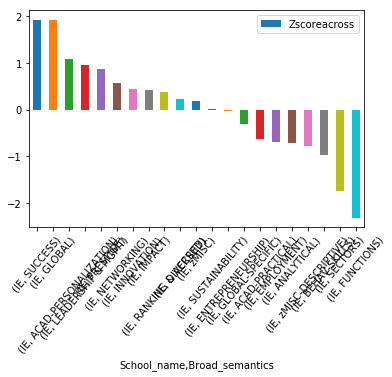

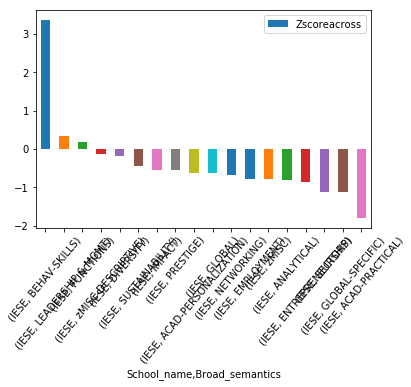

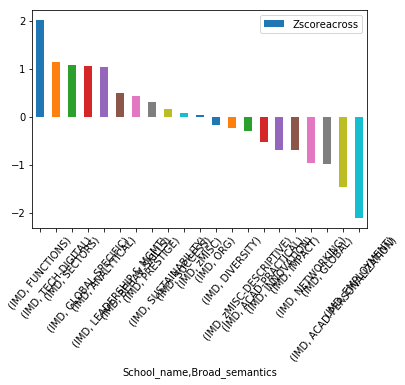

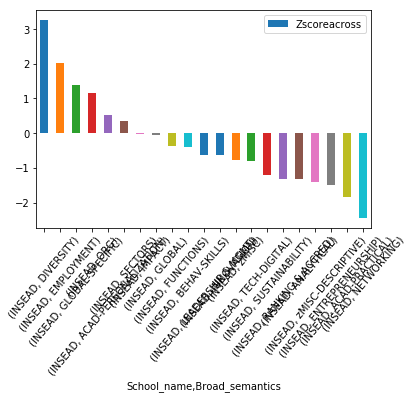

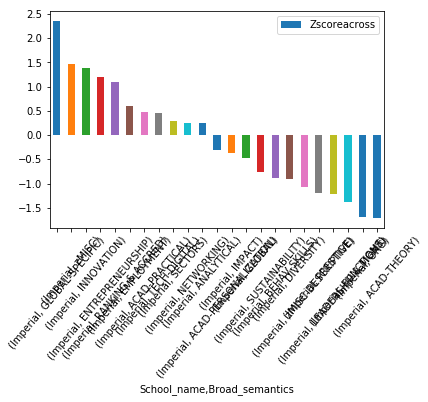

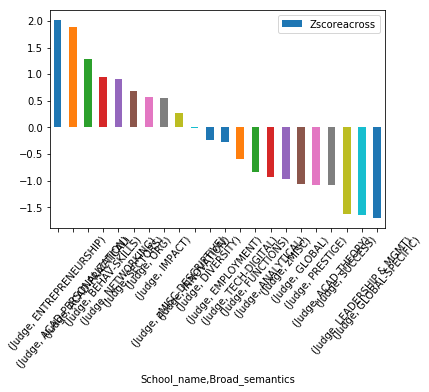

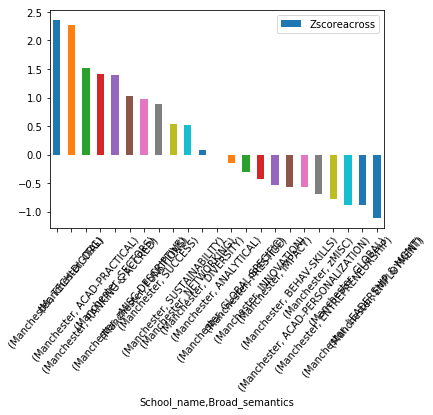

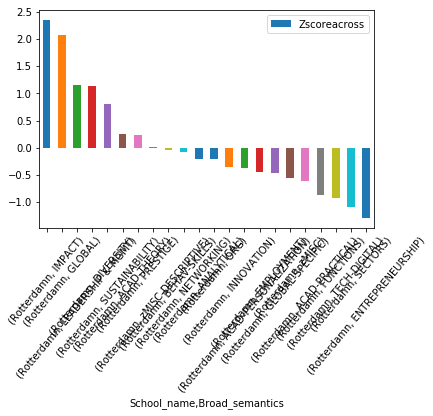

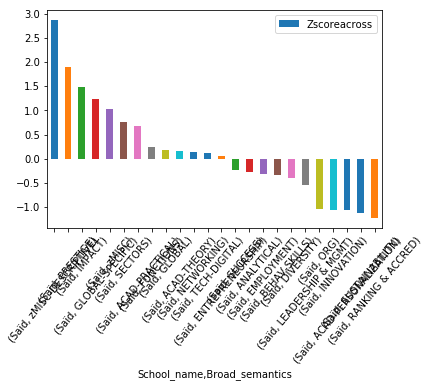

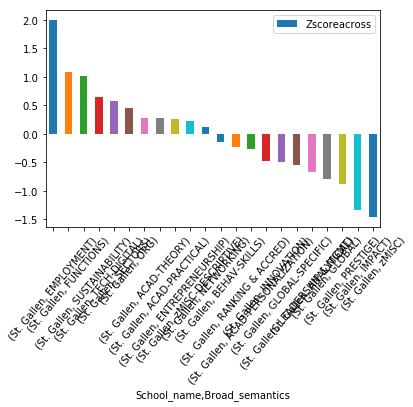

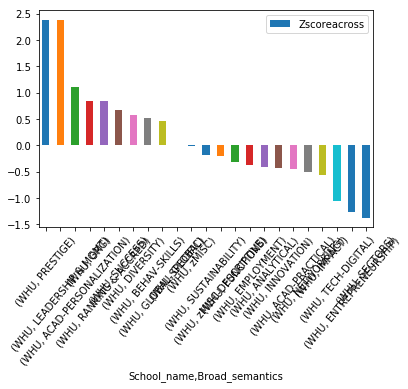

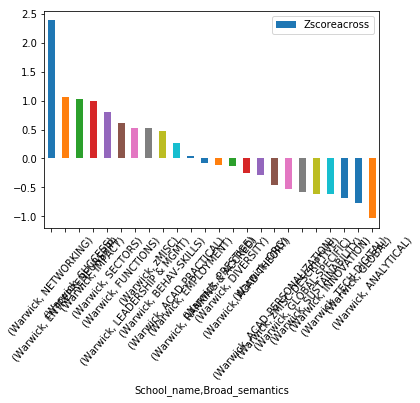

In [6]:
broadsemplotcategories = BroadSemantics.sort_values(by='Zscoreacross',ascending=False).groupby(['School_name']).plot.bar(y='Zscoreacross', rot=50, align='center')


In [31]:
##Scatter Plot Broad Categories

FreqAve = BroadSemantics.groupby('Broad_semantics')['Freq'].mean()
Freqstdev = BroadSemantics.groupby('Broad_semantics')['Freq'].std(ddof=0)

Broadscatter = pd.DataFrame(FreqAve)

Broadscatter = Broadscatter.rename(columns = {'Freq':"FreqAve"})

Broadscatter['Freqstdev'] = pd.DataFrame(Freqstdev)

Broadscatter.head(30)

,FreqAve,Freqstdev
Broad_semantics,,
ACAD-PERSONALIZATION,0.046479,0.023957
ACAD-PRACTICAL,0.114529,0.024467
ACAD-THEORY,0.008501,0.005798
ANALYTICAL,0.014554,0.008957
BEHAV-SKILLS,0.052245,0.043303
DIVERSITY,0.014169,0.013499
EMPLOYMENT,0.081491,0.031773
ENTREPRENEURSHIP,0.028310,0.014398
FUNCTIONS,0.036337,0.012899


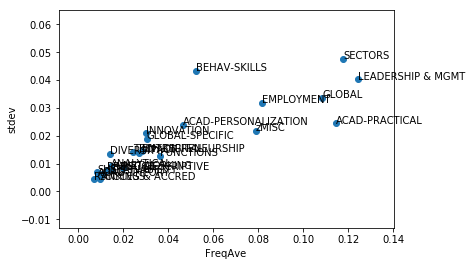

In [44]:

plt.scatter(Broadscatter.FreqAve, Broadscatter.Freqstdev)
plt.xlabel("FreqAve")
plt.ylabel("stdev")


for idx, row in Broadscatter.iterrows(): 
    plt.text(row['FreqAve'], row['Freqstdev'], idx)
    
plt.show()